#Week8 Mini Assignment
## Author: Johnson Yun
## Date: 21th of Oct (edited on 29th of Oct & 15th of Nov)

In this notebook, we will focus on Australia only to conduct exploratory data analysis on this data set. With the driving goal in mind " What is the death rate of COVID? And the uncertainties in data analysis. First data cleansing is performed to ensure the data is ready use. Then basic statistic values and visualisations will be used to assist in understanding the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import altair as alt
from datetime import datetime, timedelta

# Dataset 1

Our group had decided to have a look at the COVID19 cases in Australia. The first data comes from www.covid19data.com.au, collected by Juliette O'Brien. Data provided currently covers: Confimed cases, 
Deaths,
Tests,
Positive Tests,
Recovered,
Hospitalised,
ICU beds,
Ventilators. And I'll first read in the data as df.

In [2]:
url = 'https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_national.csv'
df = pd.read_csv(url, error_bad_lines=False)
df


,date,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum
0,2020-01-25,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2020-01-30,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2020-01-31,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2020-02-01,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2020-02-02,2,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2020-02-03,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In order to have a clearer observation, I decided to use a line graph to compare the death cases with the confirmed cases in Australia. 

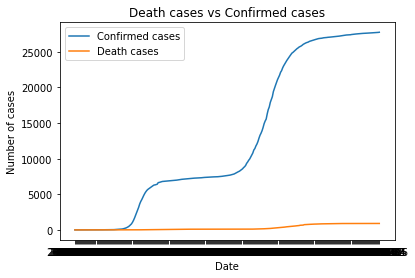

In [3]:
x  = df.date
y1 = df.confirmed_cum
y2 = df.deaths_cum

plt.plot(x, y1, label="Confirmed cases")
plt.plot(x, y2, label="Death cases")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.title("Death cases vs Confirmed cases")
plt.legend()
plt.show()



According to WHO, I'll use Case fatality ratio (CFR) to estimate mortality from COVID-19. The formula of CFR is number of deaths from disease divided by number of confirmed cases of disease. So, I'll use the latest number of deaths divided by the latest number of confirmed cases, given by the dataset and round it to 2 decimial place in percent.


In [4]:
a = df.deaths_cum.iloc[-1]
b = df.confirmed_cum.iloc[-1]
percentage = "{:.8%}".format(a/b)
print(percentage)

3.26846847%


The final death rate in Australia is 3.3%. However, since we have only observed the death rate in Australia, we cannot say whether COVID-19 is deadliy or not. We should compare this rate with other countries and even compare the final death rate we get with the rate of some common flus. 

#Dataset2

In the following cell, I calculated the CFR rate from the other data source which is from www.bing.com/covid The sources of this data are from multiple trusted, reliable sources, including the World Health Organization (WHO), Centers for Disease Control and Prevention (CDC), national and state public health departments, BNO News, 24/7 Wall St., and Wikipedia.

In [5]:
url2 = 'https://raw.githubusercontent.com/microsoft/Bing-COVID-19-Data/master/data/Bing-COVID19-Data.csv'
df2 = pd.read_csv(url2, error_bad_lines=False)
df3 = df2[(df2['Country_Region'] == 'Australia')]
df3




,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
8304,7166549,01/25/2020,4,NaN,0.0,NaN,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8305,7166550,01/26/2020,4,0.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8306,7166552,01/27/2020,5,1.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8307,7166554,01/28/2020,5,0.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8308,7166556,01/29/2020,7,2.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8309,7166558,01/30/2020,9,2.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8310,7166560,01/31/2020,9,0.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8311,7166563,02/01/2020,10,1.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8312,7166566,02/02/2020,12,2.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN
8313,7166568,02/03/2020,12,0.0,0.0,0.0,NaN,NaN,-25.57894,134.3597,AU,AUS,Australia,NaN,NaN


Then, I'll show the number of total deaths, total confirmed cases and  the Case Fatality rate respectively.  

In [6]:
cases = df3.Confirmed.max()
deaths = df3.Deaths.max()
df3.Confirmed.max()
rate = "{:.8%}".format(deaths/cases)
print(deaths, cases, rate)


907.0 27725 3.27141569%


Finally, I got almost the same result as the previous one with a slight difference.

In [7]:
print("Dataset1",percentage)
print("Dataset2", rate)

Dataset1 3.26846847%
Dataset2 3.27141569%
